In [4]:
import xgboost as xgb
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

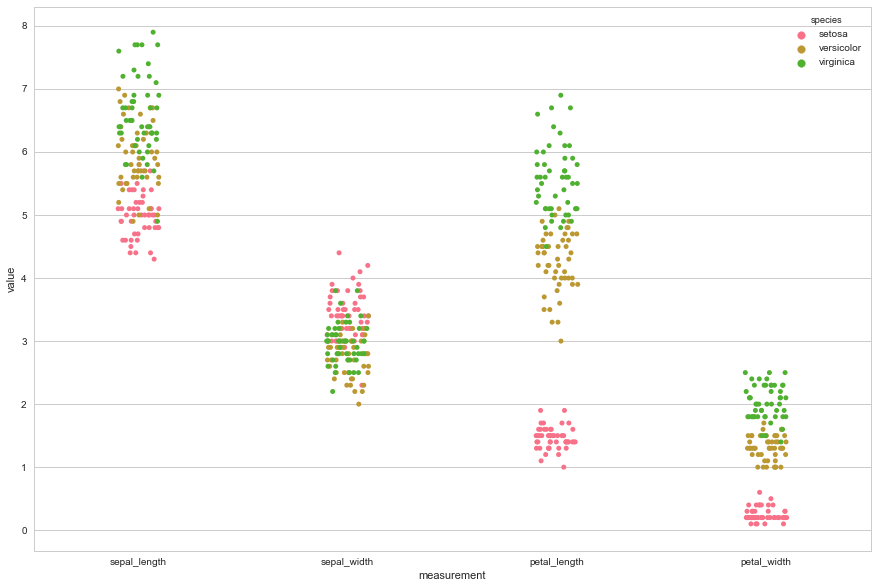

In [10]:
iris=sns.load_dataset('iris')
iris=pd.melt(iris,'species',var_name='measurement')

sns.set(style='whitegrid',palette='husl')
f,ax=plt.subplots(1,figsize=(15,10))
sns.stripplot(x='measurement',y='value',hue='species',data=iris,jitter=True,edgecolor='white',ax=ax)
plt.show()

In [13]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.data.shape
iris.target[:5]

array([0, 0, 0, 0, 0])

### 提取训练数据


In [ ]:
data=iris.data[:100]
label=iris.target[:100]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.25,random_state=0)


In [22]:
#数据处理
dtrain=xgb.DMatrix(x_train,label=y_train)
dtest=xgb.DMatrix(x_test)


### 参数设置、模型训练

In [36]:

params={
    'booster':'gbtree',     #采用什么去分类，这里用提升树
    'objective':'binary:logistic',    #目标是二分类，输出概率
    'eval_metric':'mae',    #评价标准：平均绝对误差
    'gamma':0.1,    #正则项里，作用于正则项防止过拟合
    'lamda':1,     #正则项里，控制弱分类器
    'min_child_weight':2,    #每个子树下面赋予的最小权重值
    'eta':0.1,    #学习率
    'seed':0,
    'nthread':4,   #多线程
    'silent':1    #是否显示进程
}
watch_list=[(dtrain,'train')]
xgb_clf=xgb.train(params,dtrain,num_boost_round=5,evals=watch_list)
y_pred=xgb_clf.predict(dtest)
y_pred_re=(y_pred>0.5)*1
y_pred_re

[0]	train-mae:0.454942
[1]	train-mae:0.414261
[2]	train-mae:0.377494
[3]	train-mae:0.344238
[4]	train-mae:0.314137


array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0])

### 模型评价

In [38]:

from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred_re)
#预测全部正确

array([[13,  0],
       [ 0, 12]])

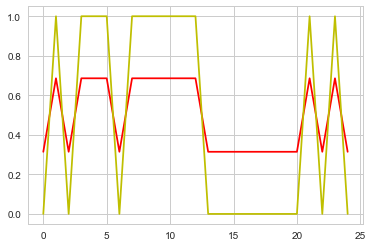

In [45]:
plt.plot(y_pred,color='r')
plt.plot(y_test,color='y')

[0]	train-mae:0.484047
[1]	train-mae:0.468628
[2]	train-mae:0.453743
[3]	train-mae:0.439388
[4]	train-mae:0.425556
[0.4261913  0.57506245 0.4261913  0.57506245 0.57506245 0.57506245
 0.4261913  0.57506245 0.57506245 0.57506245 0.57506245 0.57506245
 0.57506245 0.4261913  0.4261913  0.4261913  0.4261913  0.4261913
 0.4261913  0.4261913  0.4261913  0.57506245 0.4261913  0.57506245
 0.4261913 ]
[[13  0]
 [ 0 12]]


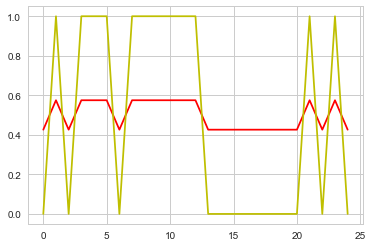

In [55]:
params["lambda"]=20    
watchlist = [(dtrain,'train')]
bst2=xgb.train(params,dtrain,num_boost_round=5,evals=watchlist)
#输出概率
y_pred2=bst2.predict(dtest)
print(y_pred2)
y_pred_re2=(y_pred2>0.5)*1
print(metrics.confusion_matrix(y_test,y_pred_re2))
#预测结果依旧准确
plt.plot(y_pred2,color='r')
plt.plot(y_test,color='y')

#关于图形变化解释：lamda调大，避免了过拟合，预测值与原值的曲线更加不拟合

[0]	train-mae:0.499996
[1]	train-mae:0.499992
[2]	train-mae:0.499988
[3]	train-mae:0.499984
[4]	train-mae:0.49998
[0.5014642 0.5014642 0.5014642 0.5014642 0.5014642 0.5014642 0.5014642
 0.5014642 0.5014642 0.5014642 0.5014642 0.5014642 0.5014642 0.5014642
 0.5014642 0.5014642 0.5014642 0.5014642 0.5014642 0.5014642 0.5014642
 0.5014642 0.5014642 0.5014642 0.5014642]
[[ 0 13]
 [ 0 12]]


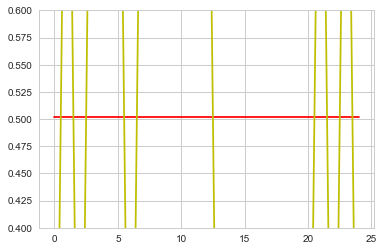

In [62]:
params["gamma"]=30 
watchlist = [(dtrain,'train')]
bst3=xgb.train(params,dtrain,num_boost_round=5,evals=watchlist)
#输出概率
y_pred3=bst3.predict(dtest)
print(y_pred3)
y_pred_re3=(y_pred3>0.5)*1
print(metrics.confusion_matrix(y_test,y_pred_re3))
#预测结果依旧准确
plt.plot(y_pred3,color='r')
plt.ylim(0.4,0.6)
plt.plot(y_test,color='y')
